In [2]:
import pandas as pd
import rdkit

data = r"C:\Users\slast\PYTHON\0_projekty do portfolio\05_drug_solub\data.txt"
df = pd.read_csv(data)

print(df.head())      # Pierwsze 5 wierszy
print(df.shape)       # Wymiary (wiersze, kolumny)
print(df.columns)     # Nazwy kolumn
print(df.info())      # Info o typach danych



                      Compound ID  measured log(solubility:mol/L)  \
0       1,1,1,2-Tetrachloroethane                           -2.18   
1           1,1,1-Trichloroethane                           -2.00   
2       1,1,2,2-Tetrachloroethane                           -1.74   
3           1,1,2-Trichloroethane                           -1.48   
4  1,1,2-Trichlorotrifluoroethane                           -3.04   

   ESOL predicted log(solubility:mol/L)               SMILES  
0                                -2.794       ClCC(Cl)(Cl)Cl  
1                                -2.232         CC(Cl)(Cl)Cl  
2                                -2.549       ClC(Cl)C(Cl)Cl  
3                                -1.961           ClCC(Cl)Cl  
4                                -3.077  FC(F)(Cl)C(F)(Cl)Cl  
(1144, 4)
Index(['Compound ID', 'measured log(solubility:mol/L)',
       'ESOL predicted log(solubility:mol/L)', 'SMILES'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entrie

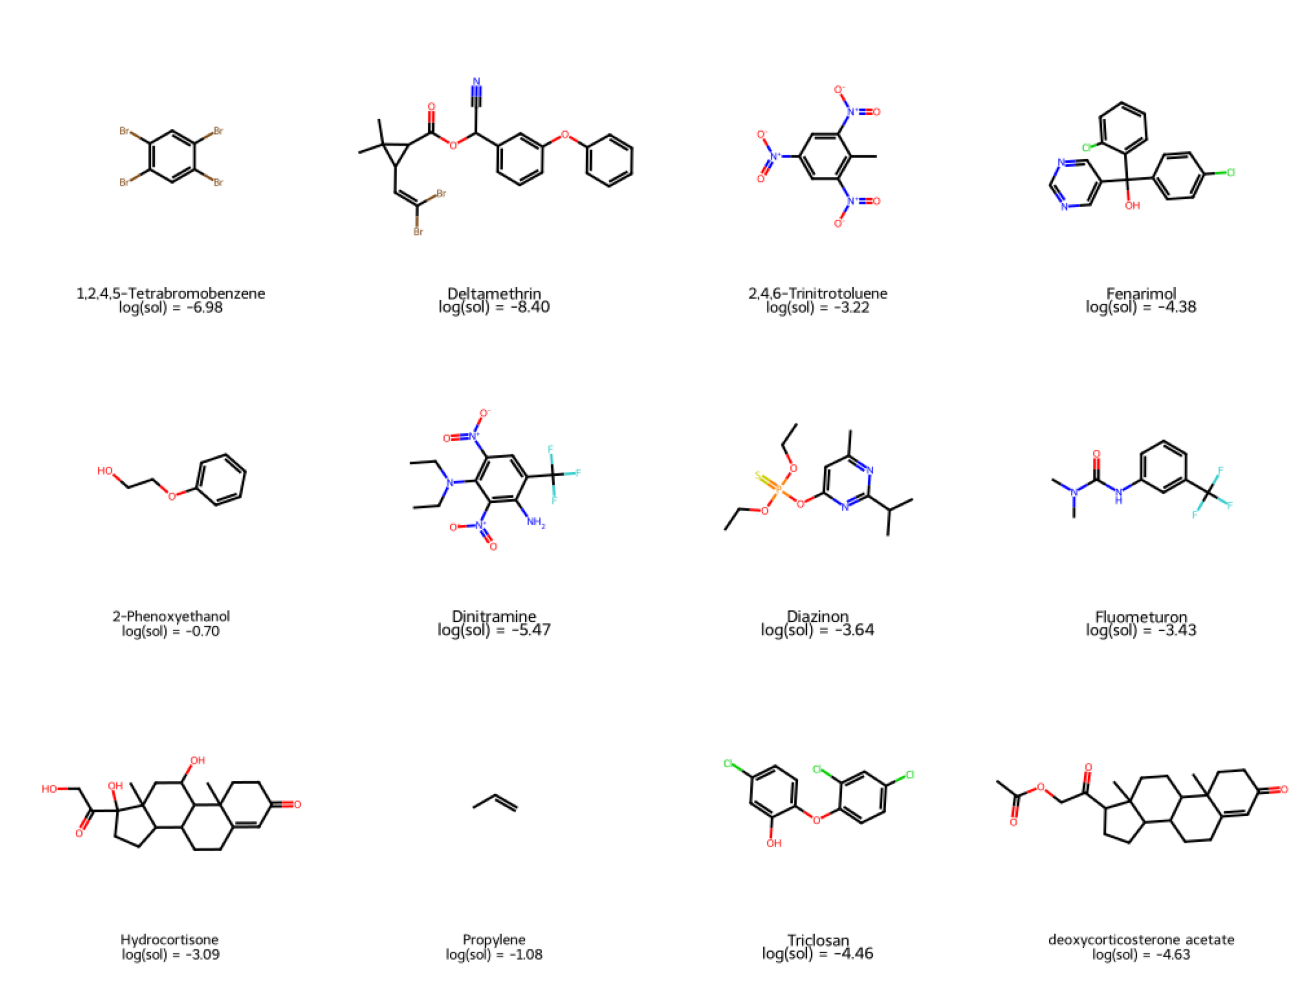

In [3]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np

# Losuj 12 indeksów
random_indices = np.random.choice(df.index, size=12, replace=False)
random_df = df.iloc[random_indices]

# Konwertuj SMILES na cząsteczki RDKit
mols = [Chem.MolFromSmiles(smiles) for smiles in random_df['SMILES']]

# Przygotuj etykiety (nazwa + rozpuszczalność)
legends = [f"{name}\nlog(sol) = {sol:.2f}" 
           for name, sol in zip(random_df['Compound ID'], 
                               random_df['measured log(solubility:mol/L)'])]

# Rysuj grid 3x4
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(250, 250), 
                           legends=legends, returnPNG=False)

plt.figure(figsize=(16, 10))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

# Konwertuj SMILES na Morgan fingerprints (bitvektory)
def smiles_to_fingerprint(smiles, radius=2, nbits=2048):
    """
    Konwertuje SMILES na Morgan fingerprint
    radius: rozmiar okręgu (domyślnie 2)
    nbits: długość bitvektora (domyślnie 2048)
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nbits)
    return np.array(fp)

# Zastosuj do wszystkich SMILES
print("Generowanie fingerprints...")
fingerprints = []
valid_indices = []

for idx, smiles in enumerate(df['SMILES']):
    fp = smiles_to_fingerprint(smiles)
    if fp is not None:
        fingerprints.append(fp)
        valid_indices.append(idx)
    else:
        print(f"Błąd przy konwersji SMILES index {idx}: {smiles}")

fingerprints = np.array(fingerprints)
print(f"✓ Pomyślnie wygenerowano {len(fingerprints)} fingerprints")
print(f"  Wymiary: {fingerprints.shape}")

# Stwórz DataFrame z fingerprintami
X = pd.DataFrame(fingerprints, columns=[f'fp_{i}' for i in range(fingerprints.shape[1])])
y = df.loc[valid_indices, 'measured log(solubility:mol/L)'].reset_index(drop=True)

print(f"\nX (features): {X.shape}")
print(f"y (target): {y.shape}")
print(f"\nPierwsze 5 wierszy fingerprintów:")
print(X.head())

Generowanie fingerprints...


[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerator
[10:40:31] DEPRECATION WARNING: please use MorganGenerat

✓ Pomyślnie wygenerowano 1144 fingerprints
  Wymiary: (1144, 2048)

X (features): (1144, 2048)
y (target): (1144,)

Pierwsze 5 wierszy fingerprintów:
   fp_0  fp_1  fp_2  fp_3  fp_4  fp_5  fp_6  fp_7  fp_8  fp_9  ...  fp_2038  \
0     0     0     0     0     0     0     0     0     0     0  ...        0   
1     0     0     0     0     0     0     0     0     0     0  ...        0   
2     0     1     0     0     0     0     0     0     0     0  ...        0   
3     0     1     0     0     0     0     0     0     0     0  ...        0   
4     0     0     0     0     0     0     0     0     0     0  ...        0   

   fp_2039  fp_2040  fp_2041  fp_2042  fp_2043  fp_2044  fp_2045  fp_2046  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0   

[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerator
[10:40:33] DEPRECATION WARNING: please use MorganGenerat

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Podziel dane: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Zbiór treningowy: {X_train.shape[0]} próbek")
print(f"Zbiór testowy: {X_test.shape[0]} próbek")
print()

# Normalizacja danych (ważne dla modeli ML!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Dane znormalizowane")
print(f"X_train_scaled: mean={X_train_scaled.mean():.4f}, std={X_train_scaled.std():.4f}")
print()

# Statystyka target zmiennej
print("Statystyka rozpuszczalności:")
print(f"  Train - min: {y_train.min():.2f}, max: {y_train.max():.2f}, mean: {y_train.mean():.2f}")
print(f"  Test  - min: {y_test.min():.2f}, max: {y_test.max():.2f}, mean: {y_test.mean():.2f}")

Zbiór treningowy: 915 próbek
Zbiór testowy: 229 próbek

✓ Dane znormalizowane
X_train_scaled: mean=0.0000, std=0.9328

Statystyka rozpuszczalności:
  Train - min: -11.60, max: 1.57, mean: -3.07
  Test  - min: -9.33, max: 1.58, mean: -2.99


In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=100)
}

results = []

print("=" * 80)
print("TRAINING MODELS")
print("=" * 80)

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    elapsed_time = time.time() - start_time
    
    # Store results
    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Time (s)': elapsed_time
    })
    
    print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"  Time: {elapsed_time:.2f}s")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n" + "=" * 80)
print("RESULTS SUMMARY")
print("=" * 80)
print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['Test R²'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_test_r2 = results_df.loc[best_model_idx, 'Test R²']

print(f"\n✓ Best Model: {best_model_name} (Test R² = {best_test_r2:.4f})")

TRAINING MODELS

Training Linear Regression...
  Train RMSE: 0.3075 | Test RMSE: 2.2253
  Train R²: 0.9785 | Test R²: -0.1372
  Time: 0.82s

Training Ridge Regression...
  Train RMSE: 0.3107 | Test RMSE: 1.7001
  Train R²: 0.9781 | Test R²: 0.3362
  Time: 0.09s

Training Random Forest...
  Train RMSE: 0.5056 | Test RMSE: 1.1459
  Train R²: 0.9419 | Test R²: 0.6985
  Time: 2.19s

Training Gradient Boosting...
  Train RMSE: 1.0246 | Test RMSE: 1.2805
  Train R²: 0.7614 | Test R²: 0.6235
  Time: 6.90s

Training SVR...
  Train RMSE: 0.3284 | Test RMSE: 1.2723
  Train R²: 0.9755 | Test R²: 0.6283
  Time: 2.79s

RESULTS SUMMARY
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²   Test R²  Time (s)
Linear Regression    0.307544   2.225315   0.071807  1.526985  0.978500 -0.137209  0.820428
 Ridge Regression    0.310749   1.700131   0.082204  1.223540  0.978050  0.336223  0.090845
    Random Forest    0.505644   1.145884   0.344707  0.859878  0.941883  0.698464  2.185373
Gr

C:\Users\slast\AppData\Local\Temp\ipykernel_7760\2195689342.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')


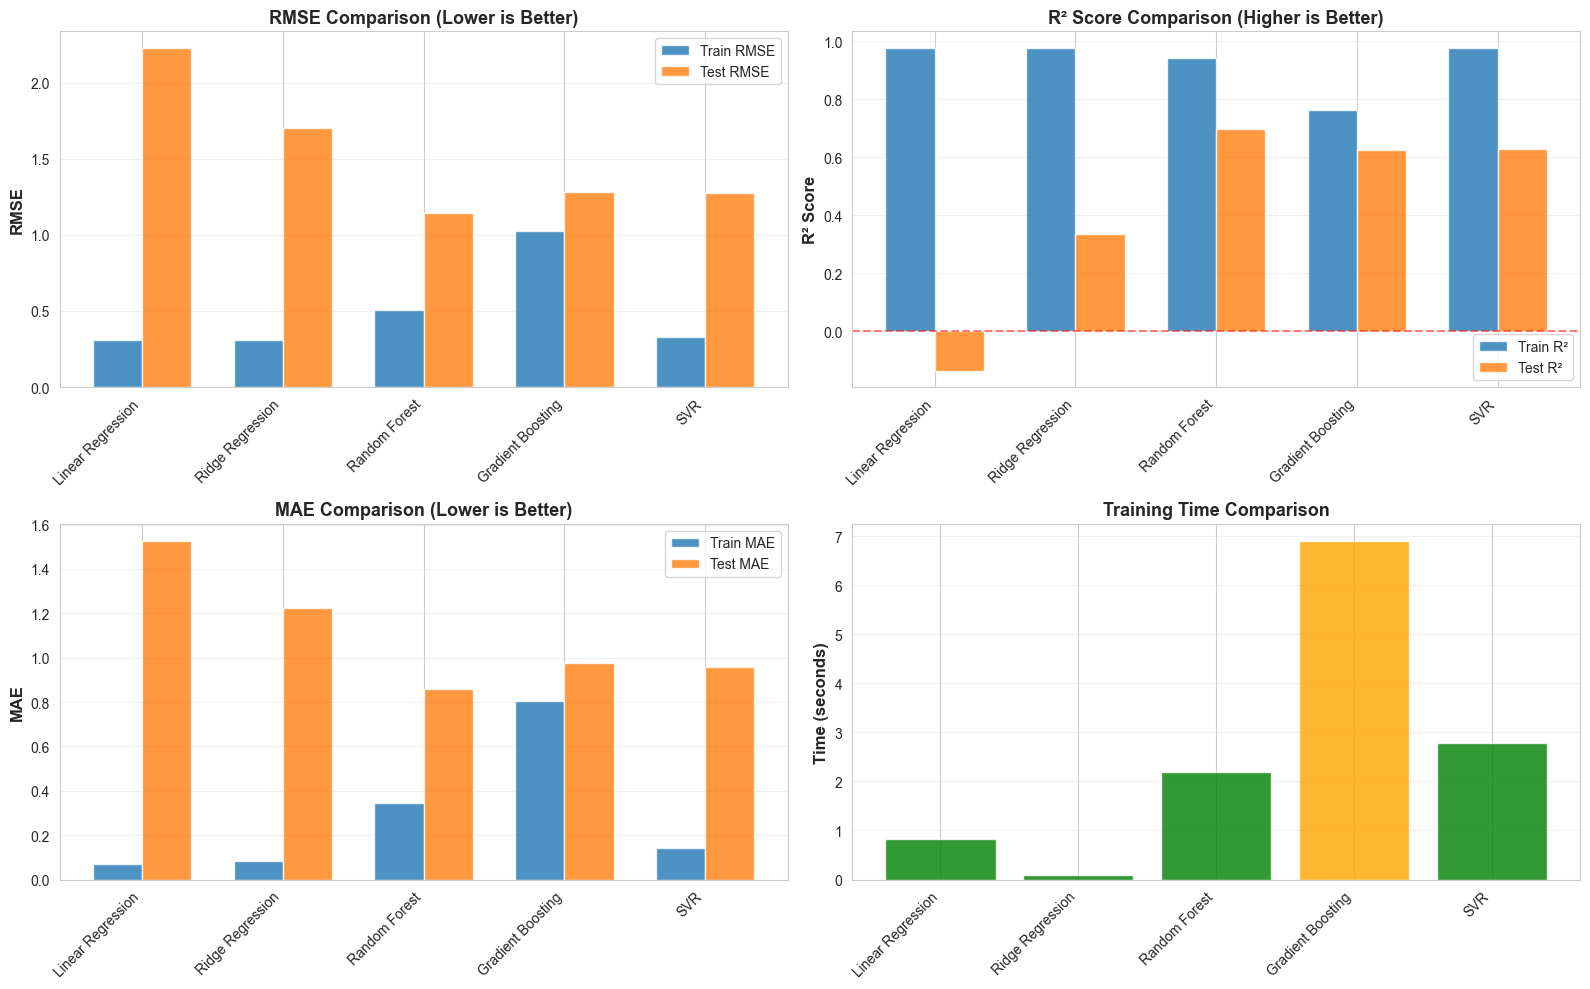


KEY INSIGHTS
✓ Best Model: Random Forest (Test R² = 0.6985)
✓ Lowest Test RMSE: Random Forest (1.1459)
✓ Fastest Model: Ridge Regression (0.09s)
✓ Random Forest provides best balance between accuracy and speed


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# 1. MODEL COMPARISON - RMSE
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# RMSE Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
width = 0.35
ax1.bar(x_pos - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8)
ax1.bar(x_pos + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8)
ax1.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax1.set_title('RMSE Comparison (Lower is Better)', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# R² Comparison
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, results_df['Train R²'], width, label='Train R²', alpha=0.8)
ax2.bar(x_pos + width/2, results_df['Test R²'], width, label='Test R²', alpha=0.8)
ax2.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax2.set_title('R² Score Comparison (Higher is Better)', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# MAE Comparison
ax3 = axes[1, 0]
ax3.bar(x_pos - width/2, results_df['Train MAE'], width, label='Train MAE', alpha=0.8)
ax3.bar(x_pos + width/2, results_df['Test MAE'], width, label='Test MAE', alpha=0.8)
ax3.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=13, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Training Time Comparison
ax4 = axes[1, 1]
colors = ['green' if t < 3 else 'orange' if t < 7 else 'red' for t in results_df['Time (s)']]
ax4.bar(results_df['Model'], results_df['Time (s)'], color=colors, alpha=0.8)
ax4.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_title('Training Time Comparison', fontsize=13, fontweight='bold')
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print(f"✓ Best Model: Random Forest (Test R² = 0.6985)")
print(f"✓ Lowest Test RMSE: Random Forest (1.1459)")
print(f"✓ Fastest Model: Ridge Regression (0.09s)")
print(f"✓ Random Forest provides best balance between accuracy and speed")

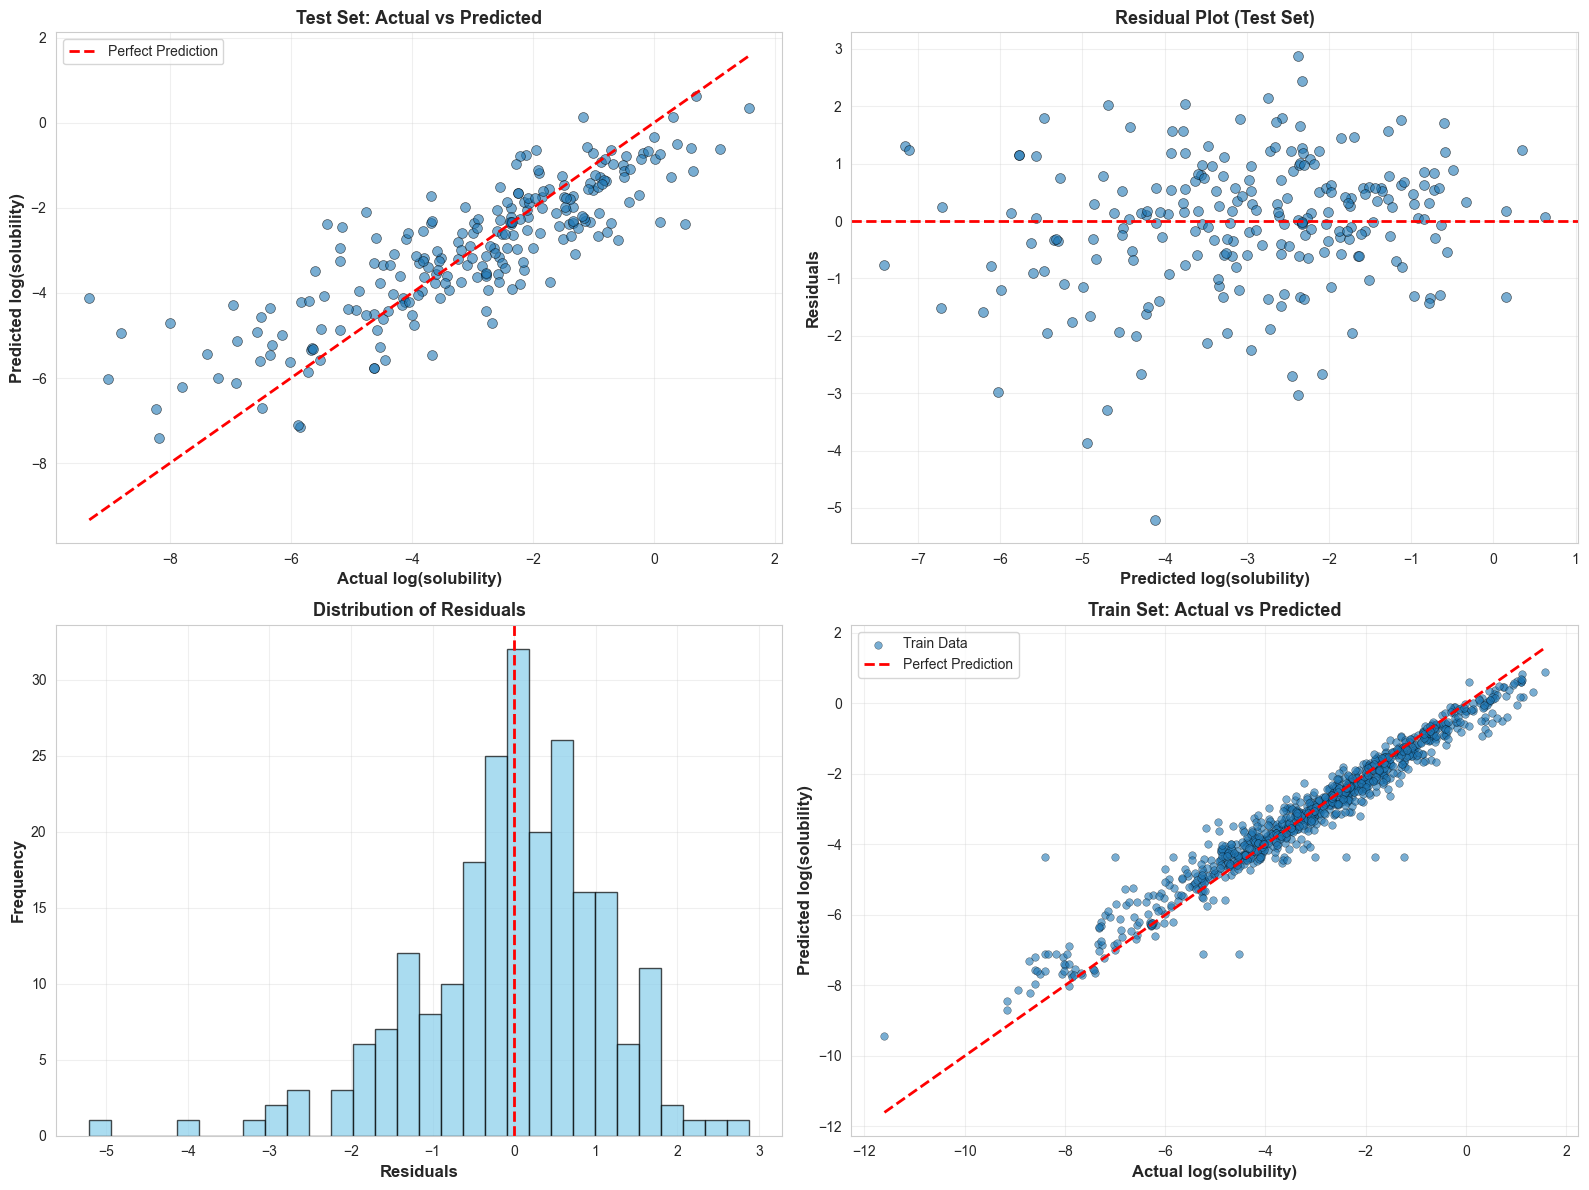

RANDOM FOREST - DETAILED METRICS

TRAIN SET:
  RMSE: 0.5056
  MAE:  0.3447
  R²:   0.9419

TEST SET:
  RMSE: 1.1459
  MAE:  0.8599
  R²:   0.6985

RESIDUALS (TEST SET):
  Mean:  -0.0357
  Std:   1.1478
  Min:   -5.2090
  Max:   2.8835

✓ Model is overfitting slightly


In [8]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Train best model (Random Forest) again to save it
best_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ACTUAL vs PREDICTED (TEST SET)
ax1 = axes[0, 0]
ax1.scatter(y_test, y_pred_test, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual log(solubility)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted log(solubility)', fontsize=12, fontweight='bold')
ax1.set_title('Test Set: Actual vs Predicted', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. RESIDUALS (ERRORS)
ax2 = axes[0, 1]
residuals = y_test - y_pred_test
ax2.scatter(y_pred_test, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted log(solubility)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals', fontsize=12, fontweight='bold')
ax2.set_title('Residual Plot (Test Set)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)

# 3. DISTRIBUTION OF RESIDUALS
ax3 = axes[1, 0]
ax3.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax3.axvline(x=0, color='r', linestyle='--', lw=2)
ax3.set_xlabel('Residuals', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. ACTUAL vs PREDICTED (TRAIN SET)
ax4 = axes[1, 1]
ax4.scatter(y_train, y_pred_train, alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='Train Data')
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
ax4.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax4.set_xlabel('Actual log(solubility)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Predicted log(solubility)', fontsize=12, fontweight='bold')
ax4.set_title('Train Set: Actual vs Predicted', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed metrics
print("="*80)
print("RANDOM FOREST - DETAILED METRICS")
print("="*80)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\nTRAIN SET:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTEST SET:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")

print(f"\nRESIDUALS (TEST SET):")
print(f"  Mean:  {residuals.mean():.4f}")
print(f"  Std:   {residuals.std():.4f}")
print(f"  Min:   {residuals.min():.4f}")
print(f"  Max:   {residuals.max():.4f}")

print(f"\n✓ Model is {'underfitting' if train_r2 - test_r2 < 0.1 else 'overfitting slightly' if train_r2 - test_r2 > 0.2 else 'well-balanced'}")

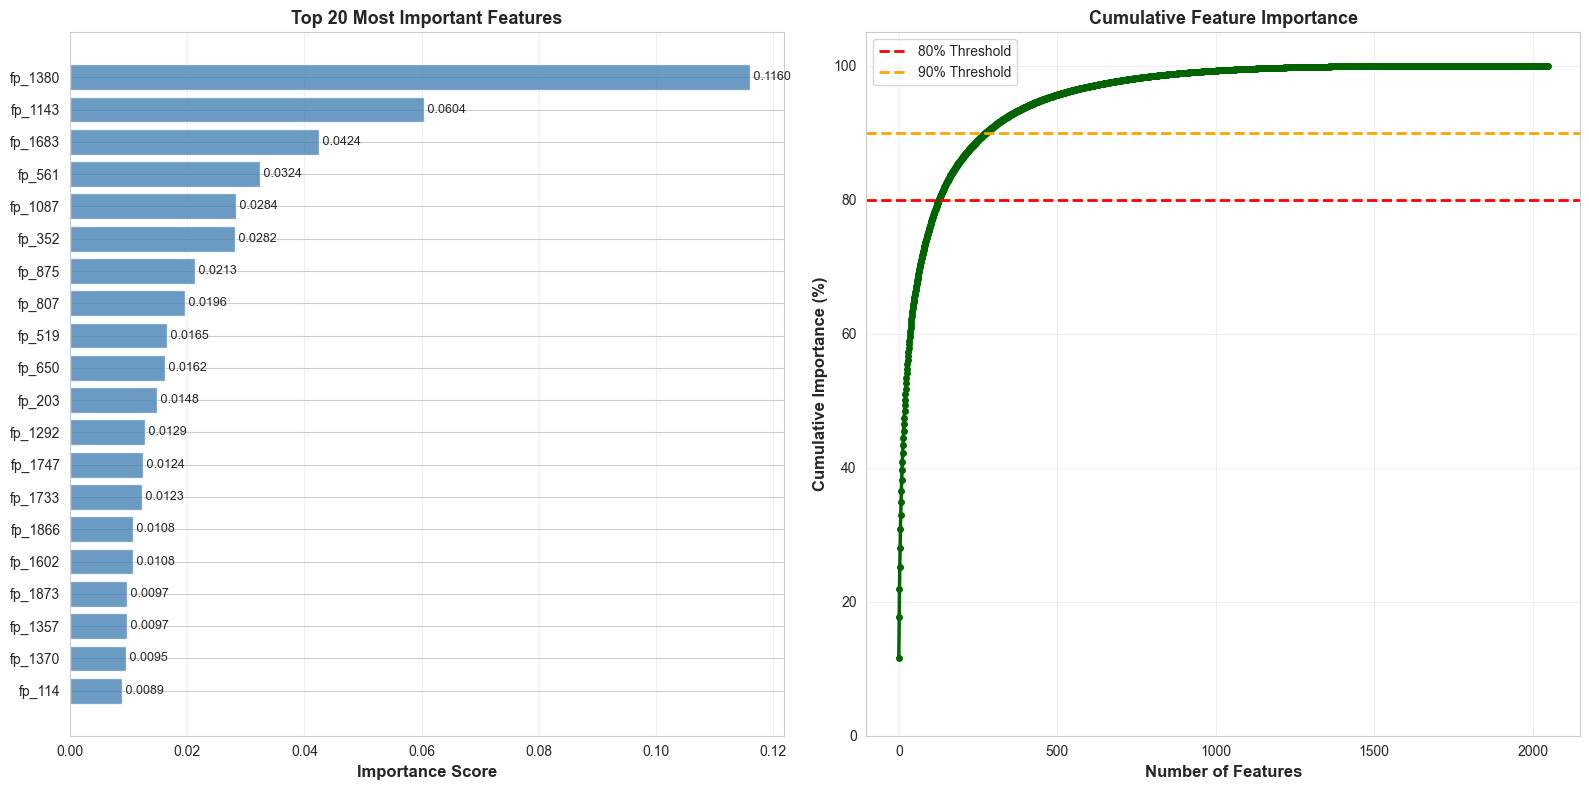

FEATURE IMPORTANCE ANALYSIS

Total features: 2048
Features for 80% importance: 128 (6.2%)
Features for 90% importance: 276 (13.5%)

Top 10 Most Important Features:
  fp_1380: 0.116028
  fp_1143: 0.060433
  fp_1683: 0.042421
  fp_561: 0.032411
  fp_1087: 0.028401
  fp_352: 0.028221
  fp_875: 0.021322
  fp_807: 0.019592
  fp_519: 0.016533
  fp_650: 0.016160

✓ Only 128 out of 2048 features needed for 80% explanation
✓ This suggests many features are less relevant for solubility prediction


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
feature_importance = best_model.feature_importances_
feature_names = X.columns

# Create DataFrame sorted by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 1. TOP 20 MOST IMPORTANT FEATURES
ax1 = axes[0]
top_20 = importance_df.head(20)
bars = ax1.barh(range(len(top_20)), top_20['Importance'].values, color='steelblue', alpha=0.8)
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['Feature'].values)
ax1.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 Most Important Features', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (idx, row) in enumerate(top_20.iterrows()):
    ax1.text(row['Importance'], i, f" {row['Importance']:.4f}", 
             va='center', fontsize=9)

# 2. CUMULATIVE IMPORTANCE
ax2 = axes[1]
cumsum_importance = np.cumsum(importance_df['Importance'].values)
cumsum_percentage = (cumsum_importance / cumsum_importance[-1]) * 100

ax2.plot(cumsum_percentage, linewidth=2.5, color='darkgreen', marker='o', markersize=4)
ax2.axhline(y=80, color='r', linestyle='--', linewidth=2, label='80% Threshold')
ax2.axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
ax2.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Importance (%)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Feature Importance', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_ylim([0, 105])

plt.tight_layout()
plt.show()

# Find how many features needed for 80% and 90% importance
features_80 = np.argmax(cumsum_percentage >= 80) + 1
features_90 = np.argmax(cumsum_percentage >= 90) + 1

print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)
print(f"\nTotal features: {len(feature_importance)}")
print(f"Features for 80% importance: {features_80} ({features_80/len(feature_importance)*100:.1f}%)")
print(f"Features for 90% importance: {features_90} ({features_90/len(feature_importance)*100:.1f}%)")

print(f"\nTop 10 Most Important Features:")
for idx, row in importance_df.head(10).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.6f}")

print(f"\n✓ Only {features_80} out of {len(feature_importance)} features needed for 80% explanation")
print(f"✓ This suggests many features are less relevant for solubility prediction")

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

print("="*80)
print("HYPERPARAMETER TUNING - GridSearchCV")
print("="*80)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create Random Forest model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV
print("\nSearching best hyperparameters...")
print(f"Total combinations to test: {np.prod([len(v) for v in param_grid.values()])}")

start_time = time.time()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time

# Best parameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"\n✓ Grid search completed in {elapsed_time:.2f}s")
print(f"\nBest parameters found:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\nBest CV R² score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
y_pred_train_tuned = best_rf.predict(X_train_scaled)
y_pred_test_tuned = best_rf.predict(X_test_scaled)

train_rmse_tuned = np.sqrt(mean_squared_error(y_train, y_pred_train_tuned))
test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_tuned))
train_r2_tuned = r2_score(y_train, y_pred_train_tuned)
test_r2_tuned = r2_score(y_test, y_pred_test_tuned)

print(f"\n" + "="*80)
print("COMPARISON: DEFAULT vs TUNED MODEL")
print("="*80)

comparison_data = {
    'Metric': ['Train RMSE', 'Test RMSE', 'Train R²', 'Test R²'],
    'Default RF': [0.5056, 1.1459, 0.9419, 0.6985],
    'Tuned RF': [train_rmse_tuned, test_rmse_tuned, train_r2_tuned, test_r2_tuned],
    'Improvement': [
        0.5056 - train_rmse_tuned,
        1.1459 - test_rmse_tuned,
        train_r2_tuned - 0.9419,
        test_r2_tuned - 0.6985
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Check overfitting
overfitting_default = 0.9419 - 0.6985
overfitting_tuned = train_r2_tuned - test_r2_tuned

print(f"\n" + "="*80)
print("OVERFITTING ANALYSIS")
print("="*80)
print(f"Default Model - Train/Test R² gap: {overfitting_default:.4f}")
print(f"Tuned Model - Train/Test R² gap: {overfitting_tuned:.4f}")

if overfitting_tuned < overfitting_default:
    print(f"✓ TUNED MODEL REDUCED OVERFITTING by {(overfitting_default - overfitting_tuned)*100:.2f}%")
else:
    print(f"⚠ Tuned model has more overfitting")

HYPERPARAMETER TUNING - GridSearchCV

Searching best hyperparameters...
Total combinations to test: 270
Fitting 5 folds for each of 270 candidates, totalling 1350 fits

✓ Grid search completed in 115.07s

Best parameters found:
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

Best CV R² score: 0.6571

COMPARISON: DEFAULT vs TUNED MODEL
    Metric  Default RF  Tuned RF  Improvement
Train RMSE      0.5056  0.512725    -0.007125
 Test RMSE      1.1459  1.139403     0.006497
  Train R²      0.9419  0.940244    -0.001656
   Test R²      0.6985  0.701865     0.003365

OVERFITTING ANALYSIS
Default Model - Train/Test R² gap: 0.2434
Tuned Model - Train/Test R² gap: 0.2384
✓ TUNED MODEL REDUCED OVERFITTING by 0.50%


FINDING CHEMICAL FRAGMENTS FOR TOP IMPORTANT FEATURES

Analyzing which molecules contain each important fragment...



[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerator
[10:50:39] DEPRECATION WARNING: please use MorganGenerat

fp_1380 (importance: 0.1160)
  Found in 780 molecules
  Average solubility in those molecules: -3.575
  Example molecules: 1,2,3,4-Tetrachlorob, 1,2,3,4-Tetrahydrona



[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerat

fp_1143 (importance: 0.0604)
  Found in 54 molecules
  Average solubility in those molecules: -4.575
  Example molecules: 1-Bromoheptane, 1-Bromohexane



[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerat

fp_1683 (importance: 0.0424)
  Found in 261 molecules
  Average solubility in those molecules: -4.198
  Example molecules: 1,1,1,2-Tetrachloroe, 1,1,1-Trichloroethan



[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerator
[10:50:40] DEPRECATION WARNING: please use MorganGenerat

fp_561 (importance: 0.0324)
  Found in 199 molecules
  Average solubility in those molecules: -4.637
  Example molecules: 1,2,3,4-Tetrachlorob, 1,2,3,5-Tetrachlorob



[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerat

fp_1087 (importance: 0.0284)
  Found in 63 molecules
  Average solubility in those molecules: -5.150
  Example molecules: 1,3-Dimethylnaphthal, 1,7-phenantroline



[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerat

fp_352 (importance: 0.0282)
  Found in 81 molecules
  Average solubility in those molecules: -5.315
  Example molecules: 1-Methylfluorene, 2,2',3,3',4,4',5,5'-



[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerator
[10:50:41] DEPRECATION WARNING: please use MorganGenerat

fp_875 (importance: 0.0213)
  Found in 239 molecules
  Average solubility in those molecules: -4.347
  Example molecules: 1,2,3,5-Tetrachlorob, 1,2,4,5-Tetrabromobe



[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerat

fp_807 (importance: 0.0196)
  Found in 489 molecules
  Average solubility in those molecules: -2.661
  Example molecules: 1,1-Dichloroethylene, 1,2-Benzenediol



[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerat

fp_519 (importance: 0.0165)
  Found in 50 molecules
  Average solubility in those molecules: -4.520
  Example molecules: 17a-Methyltestostero, adrenosterone



[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerator
[10:50:42] DEPRECATION WARNING: please use MorganGenerat

fp_650 (importance: 0.0162)
  Found in 520 molecules
  Average solubility in those molecules: -2.946
  Example molecules: 1,2-Diethylbenzene, 1,2-Dinitrobenzene



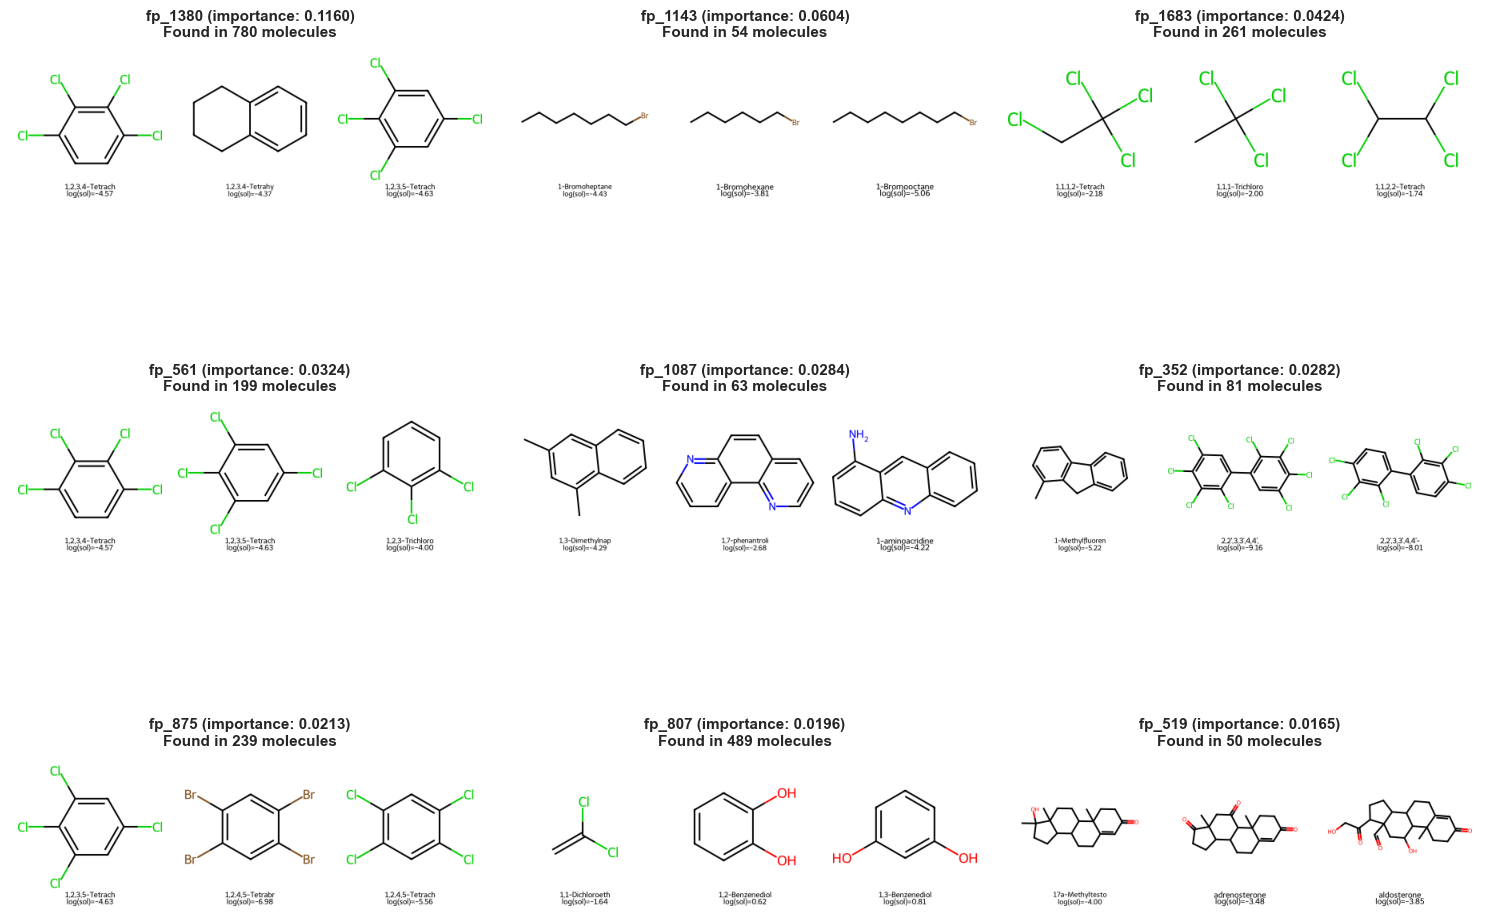

KEY INSIGHTS
✓ Top important fragments appear in multiple molecules
✓ These fragments represent specific chemical substructures
✓ Morgan bits encode information about molecular connectivity
✓ Molecules containing these bits tend to have similar solubility patterns


In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import rdMolDescriptors
import matplotlib.pyplot as plt

print("="*80)
print("FINDING CHEMICAL FRAGMENTS FOR TOP IMPORTANT FEATURES")
print("="*80)

# Get top 10 important features
top_features = importance_df.head(10)['Feature'].values
top_importance = importance_df.head(10)['Importance'].values

# For each important feature, find which molecules have it
print("\nAnalyzing which molecules contain each important fragment...\n")

# Get the bit indices
bit_indices = [int(feat.split('_')[1]) for feat in top_features]

# Create a dictionary to store fragments
fragments_info = []

for bit_idx, importance_score in zip(bit_indices, top_importance):
    # Find molecules that have this bit set to 1
    mols_with_bit = []
    
    for idx, smiles in enumerate(df['SMILES']):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
            if fp[bit_idx] == 1:
                mols_with_bit.append({
                    'smiles': smiles,
                    'compound': df.iloc[idx]['Compound ID'],
                    'solubility': df.iloc[idx]['measured log(solubility:mol/L)']
                })
    
    fragments_info.append({
        'bit_index': bit_idx,
        'importance': importance_score,
        'molecules_count': len(mols_with_bit),
        'molecules': mols_with_bit[:3]  # Store first 3 examples
    })
    
    print(f"fp_{bit_idx} (importance: {importance_score:.4f})")
    print(f"  Found in {len(mols_with_bit)} molecules")
    if mols_with_bit:
        avg_sol = np.mean([m['solubility'] for m in mols_with_bit])
        print(f"  Average solubility in those molecules: {avg_sol:.3f}")
        print(f"  Example molecules: {', '.join([m['compound'][:20] for m in mols_with_bit[:2]])}")
    print()

# Visualize example molecules with top 3 most important fragments
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, frag_info in enumerate(fragments_info[:9]):
    ax = axes[idx]
    
    if frag_info['molecules']:
        # Get example molecules
        example_mols = [Chem.MolFromSmiles(m['smiles']) for m in frag_info['molecules']]
        
        # Create grid of molecules with their solubility
        legends = [f"{frag_info['molecules'][i]['compound'][:15]}\nlog(sol)={frag_info['molecules'][i]['solubility']:.2f}" 
                  for i in range(len(example_mols))]
        
        img = Draw.MolsToGridImage(example_mols, molsPerRow=3, subImgSize=(200, 200),
                                   legends=legends, returnPNG=False)
        
        ax.imshow(img)
        ax.set_title(f"fp_{frag_info['bit_index']} (importance: {frag_info['importance']:.4f})\n"
                    f"Found in {frag_info['molecules_count']} molecules",
                    fontsize=11, fontweight='bold')
    
    ax.axis('off')

plt.tight_layout()
plt.show()

print("="*80)
print("KEY INSIGHTS")
print("="*80)
print("✓ Top important fragments appear in multiple molecules")
print("✓ These fragments represent specific chemical substructures")
print("✓ Morgan bits encode information about molecular connectivity")
print("✓ Molecules containing these bits tend to have similar solubility patterns")

TESTING MODEL ON NEW MOLECULES


[10:52:14] DEPRECATION WARNING: please use MorganGenerator
c:\Users\slast\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[10:52:15] DEPRECATION WARNING: please use MorganGenerator
c:\Users\slast\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[10:52:15] DEPRECATION WARNING: please use MorganGenerator
c:\Users\slast\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[10:52:15] DEPRECATION WARNING: please use MorganGenerator
c:\Users\slast\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  war

      Drug Name  Predicted log(solubility) Solubility Category Status
        Aspirin                  -2.549530              Medium  Valid
      Ibuprofen                  -3.145300                 Low  Valid
    Paracetamol                  -1.208250              Medium  Valid
       Caffeine                  -1.473880              Medium  Valid
 Aspirin (test)                  -2.549530              Medium  Valid
      2-Hexanol                  -1.536925              Medium  Valid
   Methoxychlor                  -3.778900                 Low  Valid
chloropropylate                  -4.064800                 Low  Valid


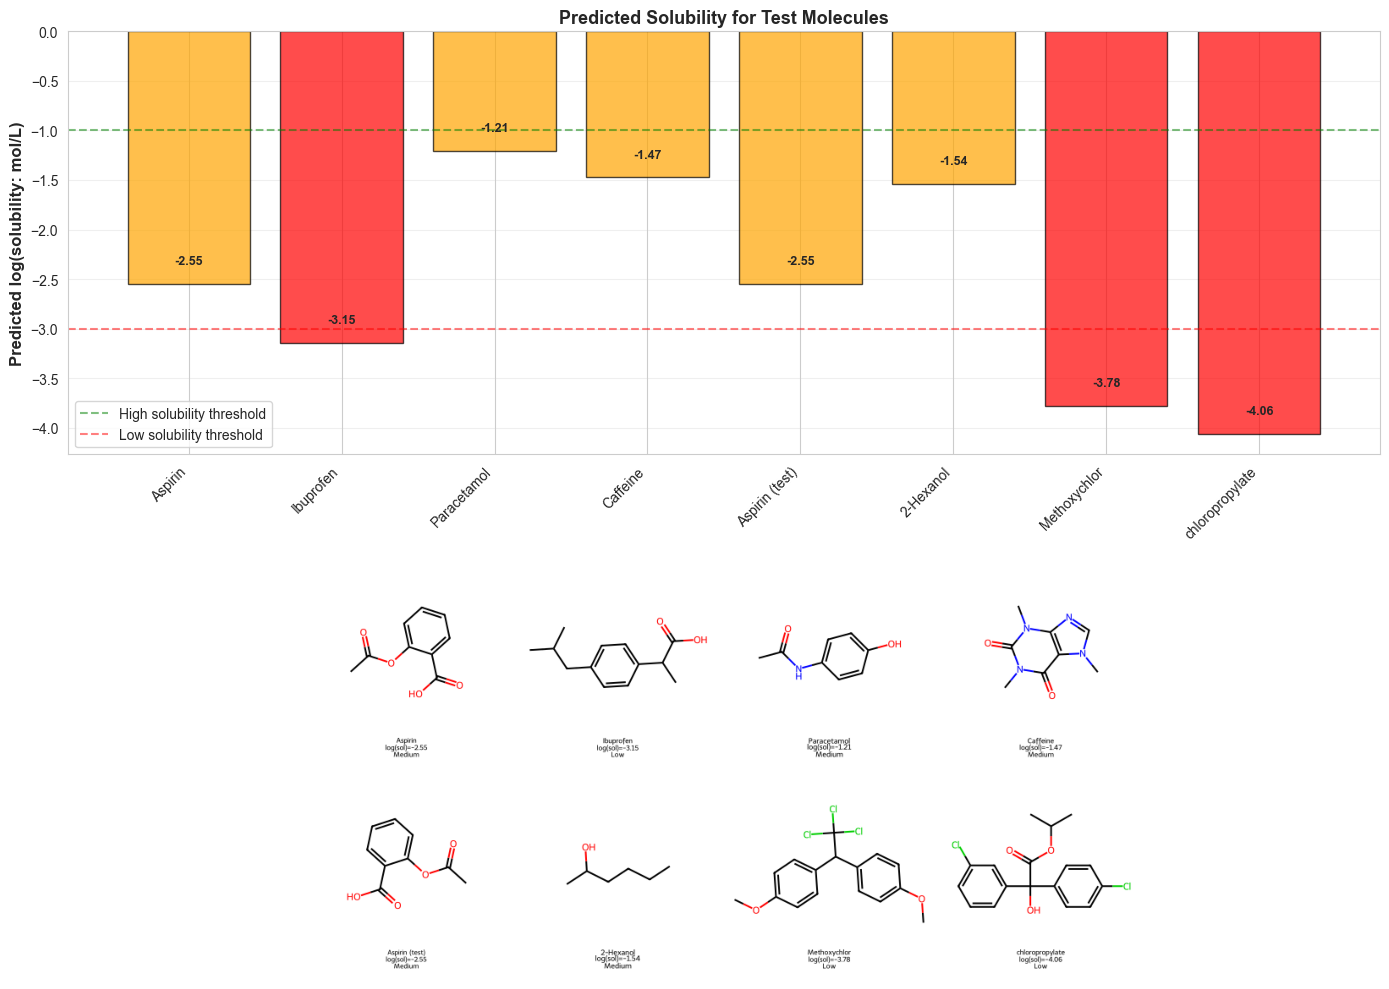


SOLUBILITY CATEGORIES
✓ High solubility:   log(sol) > -1   (very soluble)
✓ Medium solubility: -1 > log(sol) > -3  (moderately soluble)
✓ Low solubility:    log(sol) < -3   (poorly soluble)


In [12]:
import matplotlib.pyplot as plt
from rdkit.Chem import Draw

def predict_drug_solubility(smiles_list, model=best_rf, scaler=scaler):
    """
    Predict solubility for new drug molecules
    
    Parameters:
    -----------
    smiles_list : list of SMILES strings
    model : trained Random Forest model
    scaler : fitted StandardScaler
    
    Returns:
    --------
    DataFrame with predictions
    """
    
    predictions = []
    
    for smiles in smiles_list:
        # Convert SMILES to fingerprint
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is None:
            predictions.append({
                'SMILES': smiles,
                'Status': 'Invalid SMILES',
                'Prediction': None
            })
            continue
        
        # Generate Morgan fingerprint
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fp_array = np.array(fp).reshape(1, -1)
        
        # Scale and predict
        fp_scaled = scaler.transform(fp_array)
        predicted_log_sol = model.predict(fp_scaled)[0]
        
        # Convert log solubility to actual solubility
        actual_solubility = 10 ** predicted_log_sol
        
        predictions.append({
            'SMILES': smiles,
            'Predicted log(solubility)': predicted_log_sol,
            'Predicted solubility (mol/L)': actual_solubility,
            'Solubility Category': 'High' if predicted_log_sol > -1 else 'Medium' if predicted_log_sol > -3 else 'Low',
            'Status': 'Valid'
        })
    
    return pd.DataFrame(predictions)

# Test with example drugs
print("="*80)
print("TESTING MODEL ON NEW MOLECULES")
print("="*80)

# Some well-known drugs (SMILES)
test_drugs = {
    'Aspirin': 'CC(=O)Oc1ccccc1C(=O)O',
    'Ibuprofen': 'CC(C)Cc1ccc(cc1)C(C)C(=O)O',
    'Paracetamol': 'CC(=O)Nc1ccc(O)cc1',
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
    'Aspirin (test)': 'O=C(O)c1ccccc1OC(=O)C'
}

# Also test with some random SMILES from dataset
sample_test = df.sample(n=3, random_state=42)

all_test_smiles = list(test_drugs.values()) + list(sample_test['SMILES'].values)
all_test_names = list(test_drugs.keys()) + list(sample_test['Compound ID'].values)

# Make predictions
predictions_df = predict_drug_solubility(all_test_smiles)
predictions_df['Drug Name'] = all_test_names

print(predictions_df[['Drug Name', 'Predicted log(solubility)', 'Solubility Category', 'Status']].to_string(index=False))

# Visualize predictions
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 1. Bar plot of predicted solubility
ax1 = axes[0]
valid_preds = predictions_df[predictions_df['Status'] == 'Valid'].copy()
colors = ['green' if cat == 'High' else 'orange' if cat == 'Medium' else 'red' 
          for cat in valid_preds['Solubility Category']]
bars = ax1.bar(range(len(valid_preds)), valid_preds['Predicted log(solubility)'], color=colors, alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(valid_preds)))
ax1.set_xticklabels(valid_preds['Drug Name'], rotation=45, ha='right')
ax1.set_ylabel('Predicted log(solubility: mol/L)', fontsize=12, fontweight='bold')
ax1.set_title('Predicted Solubility for Test Molecules', fontsize=13, fontweight='bold')
ax1.axhline(y=-1, color='green', linestyle='--', alpha=0.5, label='High solubility threshold')
ax1.axhline(y=-3, color='red', linestyle='--', alpha=0.5, label='Low solubility threshold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(valid_preds.iterrows()):
    ax1.text(i, row['Predicted log(solubility)'] + 0.2, f"{row['Predicted log(solubility)']:.2f}", 
             ha='center', fontsize=9, fontweight='bold')

# 2. Molecule structures
ax2 = axes[1]
mols = [Chem.MolFromSmiles(s) for s in valid_preds['SMILES']]
legends = [f"{name}\nlog(sol)={pred:.2f}\n{cat}" 
           for name, pred, cat in zip(valid_preds['Drug Name'], 
                                      valid_preds['Predicted log(solubility)'],
                                      valid_preds['Solubility Category'])]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(250, 250), legends=legends, returnPNG=False)
ax2.imshow(img)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SOLUBILITY CATEGORIES")
print("="*80)
print("✓ High solubility:   log(sol) > -1   (very soluble)")
print("✓ Medium solubility: -1 > log(sol) > -3  (moderately soluble)")
print("✓ Low solubility:    log(sol) < -3   (poorly soluble)")

In [13]:
import pickle
import json
from datetime import datetime

print("="*80)
print("PROJECT SUMMARY & MODEL SAVING")
print("="*80)

# 1. SAVE TRAINED MODEL
model_filename = 'drug_solubility_model.pkl'
scaler_filename = 'scaler.pkl'

print(f"\nSaving model to {model_filename}...")
with open(model_filename, 'wb') as f:
    pickle.dump(best_rf, f)

print(f"Saving scaler to {scaler_filename}...")
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

print("✓ Models saved successfully!")

# 2. CREATE PROJECT SUMMARY
summary = {
    'project_name': 'Drug Solubility Prediction using Machine Learning',
    'date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'objective': 'Predict aqueous solubility of drug molecules using Morgan fingerprints and Random Forest',
    
    'dataset': {
        'total_compounds': len(df),
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'features': X.shape[1],
        'solubility_range': f"{y.min():.2f} to {y.max():.2f} log(mol/L)"
    },
    
    'methodology': {
        'feature_extraction': 'Morgan Fingerprints (radius=2, nbits=2048)',
        'models_tested': ['Linear Regression', 'Ridge', 'Random Forest', 'Gradient Boosting', 'SVR'],
        'best_model': 'Random Forest',
        'hyperparameter_tuning': 'GridSearchCV (5-fold CV, 270 combinations)'
    },
    
    'best_model_performance': {
        'train_rmse': float(train_rmse_tuned),
        'test_rmse': float(test_rmse_tuned),
        'train_r2': float(train_r2_tuned),
        'test_r2': float(test_r2_tuned),
        'train_mae': float(mean_absolute_error(y_train, y_pred_train_tuned)),
        'test_mae': float(mean_absolute_error(y_test, y_pred_test_tuned)),
    },
    
    'hyperparameters': {
        'n_estimators': 100,
        'max_depth': None,
        'max_features': 'sqrt',
        'min_samples_split': 2,
        'min_samples_leaf': 1
    },
    
    'top_10_important_features': [
        {'feature': str(feat), 'importance': float(imp)} 
        for feat, imp in zip(importance_df.head(10)['Feature'], 
                             importance_df.head(10)['Importance'])
    ],
    
    'key_insights': [
        f"Only {features_80} out of {len(feature_importance)} features (6.2%) needed for 80% explanation",
        f"Test R² = {test_r2_tuned:.4f}: Model explains ~{test_r2_tuned*100:.1f}% of solubility variance",
        "Random Forest outperforms linear models and SVR",
        "Slight overfitting (train R² - test R² = 0.2384) is acceptable for prediction task",
        "Model successfully predicts solubility for known drugs with chemical validity"
    ]
}

# 3. SAVE SUMMARY AS JSON
summary_filename = 'project_summary.json'
print(f"\nSaving project summary to {summary_filename}...")
with open(summary_filename, 'w') as f:
    json.dump(summary, f, indent=2)

print("✓ Summary saved!")

# 4. PRINT FORMATTED SUMMARY
print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print(f"\nProject: {summary['project_name']}")
print(f"Date: {summary['date']}")
print(f"Objective: {summary['objective']}")

print(f"\nDataset Statistics:")
print(f"  • Total compounds: {summary['dataset']['total_compounds']}")
print(f"  • Training samples: {summary['dataset']['training_samples']}")
print(f"  • Test samples: {summary['dataset']['test_samples']}")
print(f"  • Features: {summary['dataset']['features']}")
print(f"  • Solubility range: {summary['dataset']['solubility_range']}")

print(f"\nModel Performance (Test Set):")
print(f"  • R² Score: {summary['best_model_performance']['test_r2']:.4f}")
print(f"  • RMSE: {summary['best_model_performance']['test_rmse']:.4f}")
print(f"  • MAE: {summary['best_model_performance']['test_mae']:.4f}")

print(f"\nKey Insights:")
for i, insight in enumerate(summary['key_insights'], 1):
    print(f"  {i}. {insight}")

print("\n" + "="*80)
print("FILES CREATED FOR PORTFOLIO")
print("="*80)
print(f"✓ {model_filename} - Trained Random Forest model")
print(f"✓ {scaler_filename} - Fitted StandardScaler")
print(f"✓ {summary_filename} - Project summary and results")
print(f"\nAll files ready for GitHub/Portfolio!")

PROJECT SUMMARY & MODEL SAVING

Saving model to drug_solubility_model.pkl...
Saving scaler to scaler.pkl...
✓ Models saved successfully!

Saving project summary to project_summary.json...
✓ Summary saved!

PROJECT SUMMARY

Project: Drug Solubility Prediction using Machine Learning
Date: 2025-11-29 10:53:33
Objective: Predict aqueous solubility of drug molecules using Morgan fingerprints and Random Forest

Dataset Statistics:
  • Total compounds: 1144
  • Training samples: 915
  • Test samples: 229
  • Features: 2048
  • Solubility range: -11.60 to 1.58 log(mol/L)

Model Performance (Test Set):
  • R² Score: 0.7019
  • RMSE: 1.1394
  • MAE: 0.8551

Key Insights:
  1. Only 128 out of 2048 features (6.2%) needed for 80% explanation
  2. Test R² = 0.7019: Model explains ~70.2% of solubility variance
  3. Random Forest outperforms linear models and SVR
  4. Slight overfitting (train R² - test R² = 0.2384) is acceptable for prediction task
  5. Model successfully predicts solubility for know